In [1]:
import os
from skimage import io
from skimage.util import random_noise
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ori_path = "./Original_Dataset"
gau_path = "./Gaussian_Dataset"
sap_path = "./Salt&Pepper_Dataset"
if os.path.exists(gau_path) == False:
    os.mkdir(gau_path)
if os.path.exists(sap_path) == False:
    os.mkdir(sap_path)
    
train_list_gau = os.path.join(gau_path, "train_list_gau.txt")
file_gau = open(train_list_gau, 'w')
train_list_sap = os.path.join(sap_path, "train_list_sap.txt")
file_sap = open(train_list_sap, 'w')
    
for i in range(11):
    current_path = os.path.join(ori_path, str(i))
    img_list = os.listdir(current_path)
    for item in img_list:
        if item.endswith(".jpg"):
            img = io.imread(os.path.join(current_path, item))
#             add gaussian noise
            img_gau = random_noise(img, mode='gaussian', seed=None, clip=True)
#             add salt&pepper noise
            img_sap = random_noise(img, mode='s&p')
            name_gau = item.split(".")[0]+"_gau."+item.split(".")[1]
            name_sap = item.split(".")[0]+"_sap."+item.split(".")[1]
#             save gaussian noise image
            path_gau = os.path.join(gau_path, str(i))
            if os.path.exists(path_gau) == False:
                os.mkdir(path_gau)
            io.imsave(os.path.join(path_gau, name_gau), img_gau)
            file_gau.write(name_gau.split(".")[0]+" "+str(i)+"\n")
#             save salt&pepper noise image
            path_sap = os.path.join(sap_path, str(i))
            if os.path.exists(path_sap) == False:
                os.mkdir(path_sap)
            io.imsave(os.path.join(path_sap, name_sap), img_sap)
            file_sap.write(name_sap.split(".")[0]+" "+str(i)+"\n")
            
file_gau.close()
file_sap.close()

/Users/luke/anaconda/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


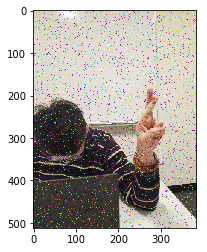

In [7]:
img = io.imread("./Test_Set/query_image/test_0007.jpg")
# plt.imshow(img)
# img_gau = random_noise(img, mode='gaussian', seed=None, clip=True)

# io.imsave("./")

img_sap = random_noise(img, mode='s&p')
plt.imshow(img_sap)